### Project to Predict Energy Output Based on Windspeed
#### GMIT HDip MLS Project [1]

This notebook is for the project for Machine Learning and Statistics for GMIT HDip in Data Analytics. Work largely based on Dr. McLoughlin's lectures; some other references mentioned in the relevant files. To predict energy based on wind.

***

1. Download the data
2. Run regression on it
3. "Train" the model
4. Give an analysis of the model's accuracy

***
First we read in the csv file wind.csv [2]

In [2]:
# To read in the data from the file
import csv
# For numerical arrays
import numpy as np
# For plotting
import matplotlib.pyplot as plt
# For dataframes
import pandas as pd

In [3]:
# Read in the file to a db 
myFile = pd.read_csv('wind.csv', sep=',')

In [4]:
# Get array values from db
x = np.array(myFile.iloc[:,0])
y = np.array(myFile.iloc[:,1])

We plot the data points and use regression to find a line of best fit. [5]

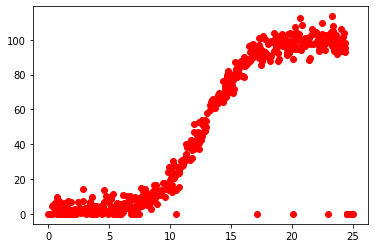

In [5]:
# Plot the points.
plt.plot(x, y, 'ro')
plt.show()

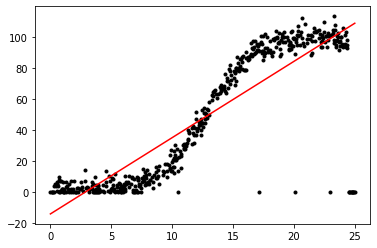

In [6]:
# Do regression on the x and y arrays using numpy.
m,c = np.polyfit(x, y, 1)
# Plot x and y and the regression line in red.
plt.plot(x, y, 'k.')
plt.plot(x, m * x + c, 'r-')
plt.show()

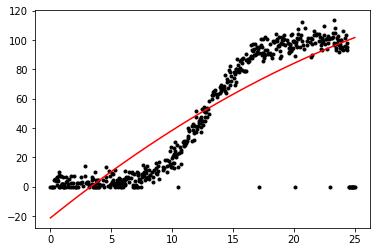

In [7]:
# Try a quadratic
a, b, c = np.polyfit(x, y, 2)
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x  + b * x + c, 'r-')
plt.show()

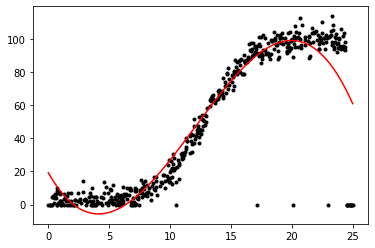

In [8]:
# Try a cubic, which is closer to what we would expect for the S shape
a, b, c, d = np.polyfit(x, y, 3)
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x * x + b * x * x + c * x + d, 'r-')
plt.show()

There's obviously a limit here - the turbines turning off at 24.5 or whatever... how best to fit this? Let's try an extra dimension or two and see if that helps. [3]

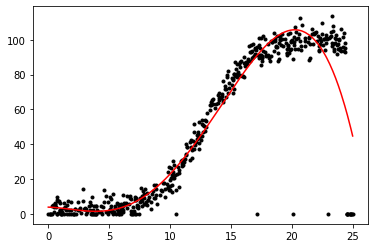

In [9]:
# A 4-dimensional polynomial line of best fit 
a, b, c, d, e = np.polyfit(x, y, 4)

# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x * x * x + b * x * x * x + c * x * x+ d * x + e, 'r-')
plt.show()

Closer...

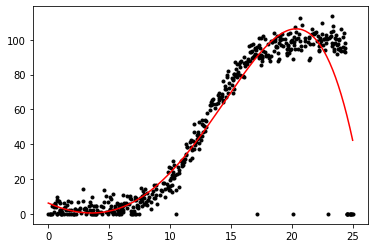

In [10]:
# 5-dimensional
a, b, c, d, e, f = np.polyfit(x, y, 5)

# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x * x * x * x + b * x * x * x * x + c * x * x * x + d * x * x + e * x + f, 'r-')
plt.show()

Seems to be diminishing returns here. Surely it's possible to fit a model just within a range?

We will do some preprocessing of the data. It seems every value above a certain point is 0 - presumably the wind turbines turn off for fear of breaking. Let's find out what that value is.

***

Preprocessing: We work out above which values the output will always be zero. Similarly for minimal values, though they are largely ignorable as their values would only be predicted as tiny anyway, and therefore close to 0. [4]

In [11]:
[len(x),len(y)]

[500, 500]

In [12]:
for i in range(500):
    if y[i]==0:
        print(x[i])

0.0
0.125
0.15
0.225
0.275
0.726
0.7509999999999999
1.026
1.0759999999999998
1.301
1.5519999999999998
1.6769999999999998
1.827
2.0269999999999997
2.077
2.102
2.252
3.128
3.5039999999999996
3.5789999999999997
3.679
3.779
3.804
3.8789999999999996
4.428999999999999
4.88
5.556
5.781000000000001
5.806
5.931
6.782
6.857
6.957000000000001
7.107
7.432
10.511
17.167
20.095
22.998
24.499000000000002
24.525
24.575
24.65
24.75
24.775
24.85
24.875
24.95
25.0


Find the minimum and maximum nonzero values in the list...

In [13]:
min = 25
max = 0
for i in range(500):
    if x[i] < min and y[i]!=0:
        min = x[i]
    if max < x[i] and y[i]!=0:
        max = x[i]

print("Minimum nonzero x is ", min, " Maximum nonzero x is ", max)

Minimum nonzero x is  0.325  Maximum nonzero x is  24.399


There are also some zeros scattered in the middle - we wish to avoid those, so we find the maximum and minimum bounding zeros.

In [14]:
min = 25
max = 0
for i in range(500):
    if y[i] == 0 and x[i] < min and y[i+1]!=0:
        min = x[i]
    if y[i] ==0 and max < x[i] and y[i-1]!=0:
        max = x[i]

print("Upper bound for lower zeros x is ", min, " Lower bound for upper zeros x is ", max)

Upper bound for lower zeros x is  0.275  Lower bound for upper zeros x is  24.499000000000002


So the threshold for lower zeros is between 0.275 and 0.325 and the threshold for upper zeros is between 24.399 and 24.499. Let's set our range as below 24.45.
We can leave the lower values in, as, if present, they will be near 0 anyway, whereas the values above 24.45 would definitely skew the curve.

***

Preprocessed dataframe: Here, we remove all values above 24.5 from the data.

In [15]:
# Preprocess and remove x's above 24.45.

# We'll create a new df 
preprocessed = []
for i in range(500):
    if x[i]<24.45:
        preprocessed.append([x[i],y[i]])

EditedData=np.array(preprocessed)
myEditedFile = pd.DataFrame({'X': EditedData[:, 0], 'Y': EditedData[:, 1]})
print(myEditedFile)

          X        Y
0     0.000    0.000
1     0.125    0.000
2     0.150    0.000
3     0.225    0.000
4     0.275    0.000
..      ...      ...
485  24.249  103.700
486  24.299   93.694
487  24.349   93.078
488  24.374   98.223
489  24.399   95.117

[490 rows x 2 columns]


In [16]:
x = np.array(myEditedFile.iloc[:,0])
y = np.array(myEditedFile.iloc[:,1])

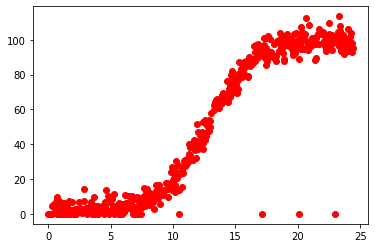

In [17]:
# Plot the points.
plt.plot(x, y, 'ro')
plt.show()

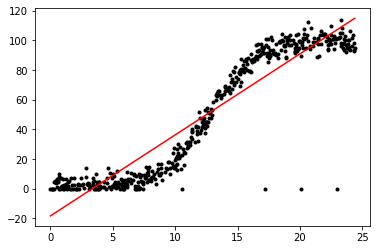

In [18]:
# Do regression on the x and y arrays using numpy.
m,c = np.polyfit(x, y, 1)
# Plot x and y and the regression line in red.
plt.plot(x, y, 'k.')
plt.plot(x, m * x + c, 'r-')
plt.show()

We experiment and check which line appears to be the best fit for 2<=n<=7

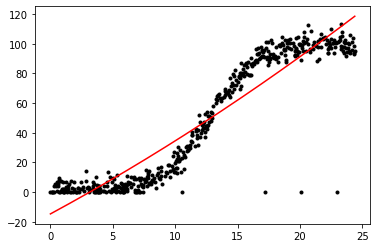

In [19]:
# Find the parameters which give the best approximating quadratic.
a, b, c = np.polyfit(x, y, 2)

# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x  + b * x + c, 'r-')
plt.show()

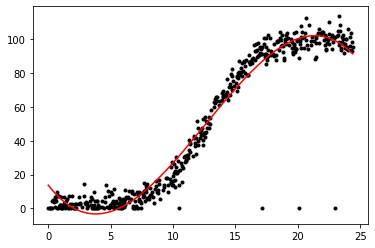

In [20]:
# A cubic...
a, b, c, d = np.polyfit(x, y, 3)

# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x * x + b * x * x + c * x + d, 'r-')
plt.show()

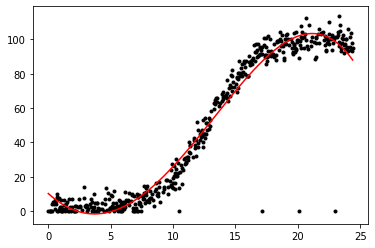

In [21]:
# Quartic...
a, b, c, d, e = np.polyfit(x, y, 4)

# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x * x * x + b * x * x * x + c * x * x+ d * x + e, 'r-')
plt.show()

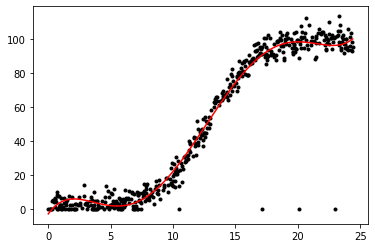

In [22]:
# Quintic...
a, b, c, d, e, f = np.polyfit(x, y, 5)

# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x * x * x * x + b * x * x * x * x + c * x * x * x + d * x * x + e * x + f, 'r-')
plt.show()

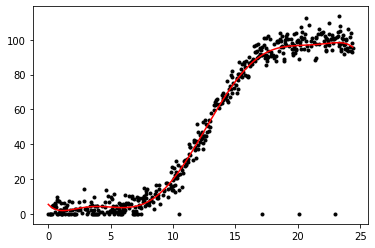

In [23]:
# Septic...?
a, b, c, d, e, f, g, h = np.polyfit(x, y, 7)

# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x * x * x * x * x * x + b * x * x * x * x * x * x + c * x * x * x * x * x + d * x * x * x * x + e * x * x * x + f * x * x + g * x + h, 'r-')
plt.show()

Visually, it appears n=7 is more accurate, but solving a 7-dimensional equation is more difficult than solving a lower-dimensional one, so we will leave options for lower dimensions for the version we put online, in case there is a load of traffic............

However, we will verify, rather than guess visually,  which curve offers the closest approximation by excluding a sample from the dataframe and trying to predict their actual values.

***
#### Testing the models...

We hold back 20% of the data, train the model using the other 80%, and see how accurate it is.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train, test = train_test_split(myEditedFile, test_size=0.2, shuffle=False)

In [26]:
[len(train),len(test)]

[392, 98]

(These counts are fine - we took out 10 values where x > 24.45)

In [27]:
xT = np.array(train.iloc[:,0]) # We'll use capital T for train, small t for test
yT = np.array(train.iloc[:,1]) 

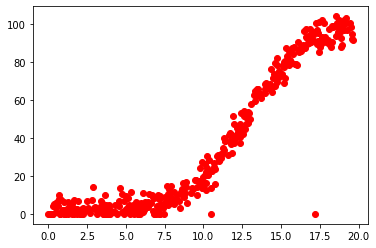

In [28]:
# Plot the points.
plt.plot(xT, yT, 'ro')
plt.show()

This is our training set. (I did not notice until later that the "random" sample was all the highest x values - will amend in a later cell shortly.)

In [29]:
xt = np.array(test.iloc[:,0])
yt = np.array(test.iloc[:,1])

Let's have a look at the test data.

errsum is 0.29534670245633393


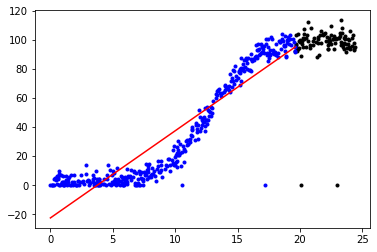

In [30]:
a1,b1 = np.polyfit(xT, yT, 1) # Here, a1 and b1 are the best-fit coefficients for a 1-dimensional polynomial 
errsum = 0
for i in range(len(xt)):
    x_t = test.iloc[i,0]
    y_t = test.iloc[i,1]
    errsum = abs(errsum + (a1*x_t+b1-y_t))/len(xt)
    # plt.plot(x_t,a1*x_t+b1,'g.') Obviously these are on the line of best fit.. No need to plot them
print("errsum is", errsum)

plt.plot(xt, yt, 'k.') # Well, there's a problem to start with - a non-random random selection

a1,b1 = np.polyfit(xT, yT, 1) # This gives the line of best fit according to our training set

plt.plot(xT, yT, 'b.') # This is the training set
plt.plot(xT, a1 * xT + b1, 'r-') # This plots the line of best fit

plt.show()

The random sample is clearly not random. I guess this is due to the shuffle=False option. Will reconstruct Trial and test sets.

***

Start over, using a random sample which is actually random.

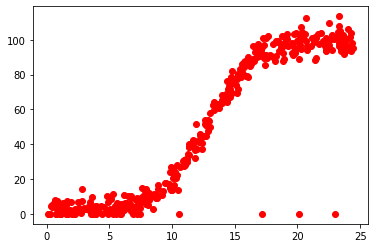

In [31]:
train, test = train_test_split(myEditedFile, test_size=0.2)
xT = np.array(train.iloc[:,0]) # We'll use capital T for train, small t for test
yT = np.array(train.iloc[:,1])
xt = np.array(test.iloc[:,0])
yt = np.array(test.iloc[:,1])
plt.plot(xT, yT, 'ro')
plt.show()

We calculate n-polynomials of bestfit. errsum is a measure of accuracy, checking the difference between actual test values and their predictions.

errsum is 0.18915707865772705


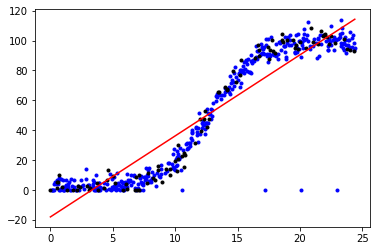

In [32]:
a1,b1 = np.polyfit(xT, yT, 1) # Gives straight line of best fit according to training set; a1 and b1 coefficients.

errsum = 0
for i in range(len(xt)):
    x_t = test.iloc[i,0]
    y_t = test.iloc[i,1]
    errsum = abs(errsum + (a1*x_t+b1-y_t))/len(xt)
print("errsum is", errsum)

plt.plot(xT, yT, 'b.') # This is the training set
plt.plot(xt, yt, 'k.') # This is the test set
plt.plot(x, a1 * x + b1, 'r-') # This plots the line of best fit

plt.show()

This looks much more reasonable. Let us now try a quadratic and cubic and see if they fit better.

errsum is 0.17737067655506267


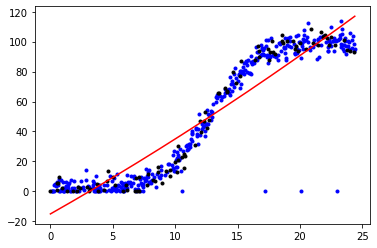

In [33]:
a2,b2,c2 = np.polyfit(xT, yT, 2) # Quadratic line of best fit according to training set; a2,b2,c2 coefficients.

errsum = 0
for i in range(len(xt)):
    x_t = test.iloc[i,0]
    y_t = test.iloc[i,1]
    errsum = abs(errsum + (a2 * x_t * x_t + b2 * x_t + c2 -y_t))/len(xt)
print("errsum is", errsum)

plt.plot(xT, yT, 'b.') # This is the training set
plt.plot(xt, yt, 'k.') # This is the test set
plt.plot(x, a2 * x * x + b2 * x + c2, 'r-') # This plots the line of best fit

plt.show()

This quadratic is almost perfectly linear, but there is a slight bend. Hopefully the cubic will provide a recognisable S-shape.

errsum is 0.07729959184194221


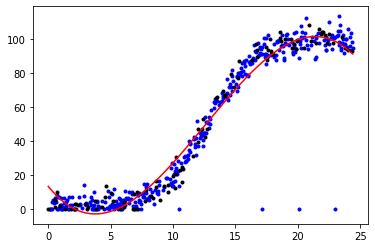

In [34]:
a3,b3,c3,d3 = np.polyfit(xT, yT, 3) # Cubic Line of best fit according to training set; a3,b3,c3,d3 coefficients.

errsum = 0
for i in range(len(xt)):
    x_t = test.iloc[i,0]
    y_t = test.iloc[i,1]
    errsum = abs(errsum + (a3 * x_t * x_t * x_t + b3 * x_t * x_t + c3 * x_t + d3 -y_t))/len(xt)
print("errsum is", errsum)

plt.plot(xT, yT, 'b.') # This is the training set
plt.plot(xt, yt, 'k.') # This is the test set
plt.plot(x, a3 * x * x * x + b3 * x * x + c3 * x + d3, 'r-') # This plots the line of best fit

#for x in range(1,25):
#    plt.plot(x, a3 * x * x * x + b3 * x * x + c3 * x + d3,'r.')

plt.show()

The cubic seems more accurate than the quadratic (lower errsum), but higher degree polynomials appear more accurate again (see below examples) for some test sets. I will run over a number of random test selections and see which appears to have the lowest errsum the most often. 

errsum is 0.07210354015389167


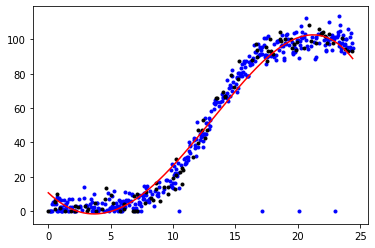

In [35]:
a4,b4,c4,d4,e4 = np.polyfit(xT, yT, 4) #Line of best fit according to training set, 4 polynomial.

errsum = 0
for i in range(len(xt)):
    x_t = test.iloc[i,0]
    y_t = test.iloc[i,1]
    errsum = abs(errsum + (a4 * x_t * x_t * x_t * x_t + b4 * x_t * x_t * x_t + c4 * x_t * x_t + d4 * x_t + e4 -y_t))/len(xt)
print("errsum is", errsum)

plt.plot(xT, yT, 'b.') # This is the training set
plt.plot(xt, yt, 'k.') # This is the test set
plt.plot(x, a4 * x * x * x * x + b4 * x * x * x + c4 * x * x + d4 * x + e4, 'r-') # This plots the line of best fit

plt.show()

errsum is 0.02330576303661798


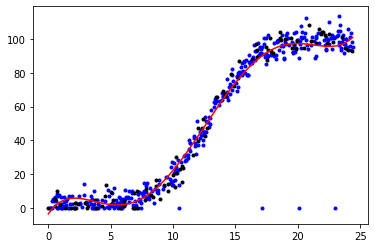

In [36]:
a5,b5,c5,d5,e5,f5 = np.polyfit(xT, yT, 5) #Line of best fit according to training set, 5 polynomial.

errsum = 0
for i in range(len(xt)):
    x_t = test.iloc[i,0]
    y_t = test.iloc[i,1]
    errsum = abs(errsum + (a5 * x_t * x_t * x_t * x_t * x_t + b5 * x_t * x_t * x_t * x_t + c5 * x_t * x_t * x_t + d5 * x_t * x_t + e5 * x_t + f5 -y_t))/len(xt)
print("errsum is", errsum)

plt.plot(xT, yT, 'b.') # This is the training set
plt.plot(xt, yt, 'k.') # This is the test set
plt.plot(x, a5 * x * x * x * x * x + b5 * x * x * x * x + c5 * x * x * x + d5 * x * x + e5 * x + f5, 'r-') # This plots the line of best fit

plt.show()

errsum is 0.02362526645471051


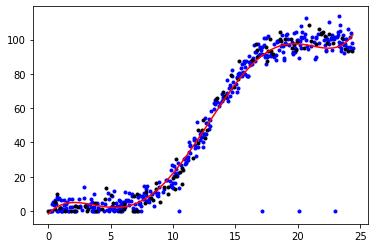

In [37]:
a6,b6,c6,d6,e6,f6,g6 = np.polyfit(xT, yT, 6) #Line of best fit according to training set, 6 polynomial.

errsum = 0
for i in range(len(xt)):
    x_t = test.iloc[i,0]
    y_t = test.iloc[i,1]
    errsum = abs(errsum + (a6 * x_t * x_t * x_t * x_t * x_t * x_t + b6 * x_t * x_t * x_t * x_t * x_t + c6 * x_t * x_t * x_t * x_t + d6 * x_t * x_t * x_t + e6 * x_t * x_t + f6 * x_t + g6 -y_t))/len(xt)
print("errsum is", errsum)

plt.plot(xT, yT, 'b.') # This is the training set
plt.plot(xt, yt, 'k.') # This is the test set
plt.plot(x, a6 *x*x*x*x*x*x + b6*x*x*x*x*x + c6 *x*x*x*x + d6 *x*x*x + e6*x*x + f6*x + g6, 'r-') # This plots the line of best fit

plt.show()

errsum is 0.00683745044048915


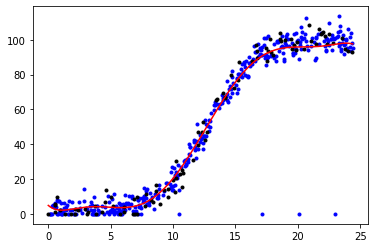

In [38]:
a7,b7,c7,d7,e7,f7,g7,h7 = np.polyfit(xT, yT, 7) #Line of best fit according to training set, 7 polynomial.

errsum = 0
for i in range(len(xt)):
    x_t = test.iloc[i,0]
    y_t = test.iloc[i,1]
    errsum = abs(errsum + (a7 * x_t * x_t * x_t * x_t * x_t * x_t * x_t + b7 * x_t * x_t * x_t * x_t * x_t * x_t + c7 * x_t * x_t * x_t * x_t * x_t + d7 * x_t * x_t * x_t * x_t + e7 * x_t * x_t * x_t + f7 * x_t * x_t + g7 * x_t + h7 -y_t))/len(xt)
print("errsum is", errsum)

plt.plot(xT, yT, 'b.') # This is the training set
plt.plot(xt, yt, 'k.') # This is the test set
plt.plot(x, a7 *x*x*x*x*x*x*x + b7*x*x*x*x*x*x + c7*x*x*x*x*x + d7*x*x*x*x + e7*x*x*x + f7*x*x + g7*x + h7, 'r-') # This plots the line of best fit

plt.show()

***
We run a thousand trials comparing polynomials of best fit for 1<n<8 for 1000 random samples to gauge which is best suited to our purposes. (These are the same computations as above, but without any plotting - simply calculating the errsum. There is undoubtedly a slicker way to merge these loops, but readability was more important here.)

In [39]:
count=[0,0,0,0,0,0,0]
for i in range(1000):
    all_errsums=[0,0,0,0,0,0,0]
    train, test = train_test_split(myEditedFile, test_size=0.2)
    xT = np.array(train.iloc[:,0])
    yT = np.array(train.iloc[:,1])
    xt = np.array(test.iloc[:,0])
    yt = np.array(test.iloc[:,1])
    
    a1,b1 = np.polyfit(xT, yT, 1)
    errsum = 0
    for i in range(len(xt)):
        x_t = test.iloc[i,0]
        y_t = test.iloc[i,1]
        errsum = abs(errsum + (a1*x_t+b1-y_t))/len(xt)
    all_errsums[0]=errsum
    
    a2,b2,c2 = np.polyfit(xT, yT, 2)
    errsum = 0
    for i in range(len(xt)):
        x_t = test.iloc[i,0]
        y_t = test.iloc[i,1]
        errsum = abs(errsum + (a2 * x_t * x_t + b2 * x_t + c2 -y_t))/len(xt)
    all_errsums[1]=errsum
    
    a3,b3,c3,d3 = np.polyfit(xT, yT, 3)
    errsum = 0
    for i in range(len(xt)):
        x_t = test.iloc[i,0]
        y_t = test.iloc[i,1]
        errsum = abs(errsum + (a3 * x_t * x_t * x_t + b3 * x_t * x_t + c3 * x_t + d3 -y_t))/len(xt)
    all_errsums[2]=errsum

    a4,b4,c4,d4,e4 = np.polyfit(xT, yT, 4)
    errsum = 0
    for i in range(len(xt)):
        x_t = test.iloc[i,0]
        y_t = test.iloc[i,1]
        errsum = abs(errsum + (a4 * x_t * x_t * x_t * x_t + b4 * x_t * x_t * x_t + c4 * x_t * x_t + d4 * x_t + e4 -y_t))/len(xt)
    all_errsums[3]=errsum
    
    a5,b5,c5,d5,e5,f5 = np.polyfit(xT, yT, 5)
    errsum = 0
    for i in range(len(xt)):
        x_t = test.iloc[i,0]
        y_t = test.iloc[i,1]
        errsum = abs(errsum + (a5 * x_t * x_t * x_t * x_t * x_t + b5 * x_t * x_t * x_t * x_t + c5 * x_t * x_t * x_t + d5 * x_t * x_t + e5 * x_t + f5 -y_t))/len(xt)
    all_errsums[4]=errsum

    a6,b6,c6,d6,e6,f6,g6 = np.polyfit(xT, yT, 6)
    errsum = 0
    for i in range(len(xt)):
        x_t = test.iloc[i,0]
        y_t = test.iloc[i,1]
        errsum = abs(errsum + (a6 * x_t * x_t * x_t * x_t * x_t * x_t + b6 * x_t * x_t * x_t * x_t * x_t + c6 * x_t * x_t * x_t * x_t + d6 * x_t * x_t * x_t + e6 * x_t * x_t + f6 * x_t + g6 -y_t))/len(xt)
    all_errsums[5]=errsum

    a7,b7,c7,d7,e7,f7,g7,h7 = np.polyfit(xT, yT, 7)
    errsum = 0
    for i in range(len(xt)):
        x_t = test.iloc[i,0]
        y_t = test.iloc[i,1]
        errsum = abs(errsum + (a7 * x_t * x_t * x_t * x_t * x_t * x_t * x_t + b7 * x_t * x_t * x_t * x_t * x_t * x_t + c7 * x_t * x_t * x_t * x_t * x_t + d7 * x_t * x_t * x_t * x_t + e7 * x_t * x_t * x_t + f7 * x_t * x_t + g7 * x_t + h7 -y_t))/len(xt)
    all_errsums[6]=errsum

    # This checks which errsum is the smallest and adds a 1 to the count list.
    min_pos = 0
    for i in range(0,7):
        if all_errsums[min_pos]>=all_errsums[i]:
            min_pos = i
    count[min_pos]=count[min_pos]+1
print(count)
print(len(test))

[39, 52, 148, 173, 91, 117, 380]
98


So the polynomial in degee 7 is significantly more accurate than, say, the polynomial in degrees 3 or 4, but it may be more computationally costly. We run some timings to check.

In [39]:
import time

tic=time.perf_counter()
for i in range(10000):
    a3,b3,c3,d3 = np.polyfit(xT, yT, 3)
toc=time.perf_counter()
print(toc-tic)

tic=time.perf_counter()
for i in range(10000):
    a4,b4,c4,d4,e4 = np.polyfit(xT, yT, 4)
toc=time.perf_counter()
print(toc-tic)

tic=time.perf_counter()
for i in range(10000):
    a7,b7,c7,d7,e7,f7,g7,h7 = np.polyfit(xT, yT, 7)
toc=time.perf_counter()
print(toc-tic)

1.3636644410144072
1.6704091069987044
1.7810765769972932


It seems the 7-degree polynomial may be worth the extra computational cost. We will provide both options on the website, hopefully.


***
Our chosen parameters: 
These are the values (approximately - they vary slightly on re-running owing to different random samples, but not much) that we use in our function.

For the cubic, our coefficients are:

In [40]:
print(a3,b3,c3,d3)

-0.03922954691613868 1.4791154963610031 -9.568105883733747 13.929132182462798


For the quartic, our coefficients are:

In [41]:
print(a4,b4,c4,d4)

-0.0009923496049894956 0.009115366586748361 0.724728861946644 -5.535346609062074


For the 7-degree polynomial, our coefficients are:

In [42]:
print(a7,b7,c7,d7,e7,f7,g7,h7)

-3.5538851181488605e-06 0.00031261992146236326 -0.010538147547102548 0.16795172168859662 -1.2697205921316257 4.38499534178267 -5.589401656650341 4.3245254394232315


(These next three plottings are purely a sanity check - plotting the graphs using the above coefficients)

In [45]:
print(a3,b3,c3,d3)

-0.03922954691613868 1.4791154963610031 -9.568105883733747 13.929132182462798


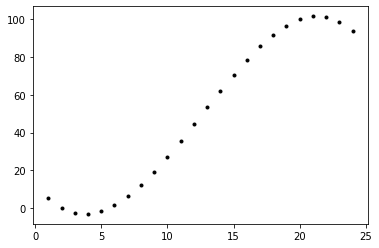

In [46]:
for x in range(1,25):
    plt.plot(x,-0.03861765590701252 * x * x * x + 1.4529925326864197 *x *x  -9.282317227419556 * x + 13.33016302693798, 'k.')
plt.show()

In [47]:
print(a4,b4,c4,d4,e4)

-0.0009923496049894956 0.009115366586748361 0.724728861946644 -5.535346609062074 9.208242121908413


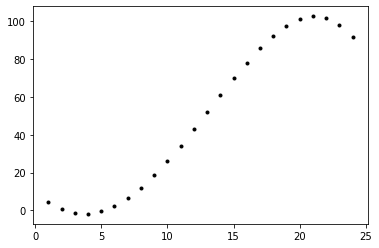

In [48]:
for x in range(1,25):
    plt.plot(x,-0.0006237267568420695 * x * x *x * x -0.008182192589590107 *x * x *x + 0.9781387068282864 * x * x -6.748775974396727 * x + 10.18397809825498, 'k.')
plt.show()

In [50]:
print(a7,b7,c7,d7,e7,f7,g7,h7)

-3.5538851181488605e-06 0.00031261992146236326 -0.010538147547102548 0.16795172168859662 -1.2697205921316257 4.38499534178267 -5.589401656650341 4.3245254394232315


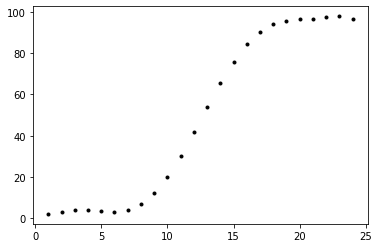

In [51]:
for x in range(1,25):
    plt.plot(x,-3.8952570448221906e-06 *x*x*x*x*x*x*x + 0.0003373218238151803*x*x*x*x*x*x -0.01118775310327892*x*x*x*x*x+ 0.17523767069753995*x*x*x*x -1.2978082114106477*x*x*x+ 4.35656528848124*x*x -5.39690607107426*x+ 4.2725523236174405
, 'k.')
plt.show()

***
As described in the HTML page, we here provide an option to ignore the values with output zero so one has the option to view them as outliers should one so choose.

***

In [52]:
x = np.array(myFile.iloc[:,0])
y = np.array(myFile.iloc[:,1])
print(x[8])

0.501


We just add a "not y[i]==0" to our preprocessing step.

In [53]:
preprocessed = []
for i in range(500):
    if (x[i]<24.45 and not y[i]==0):
        preprocessed.append([x[i],y[i]])

ExtraEditedData=np.array(preprocessed)
myExtraEditedFile = pd.DataFrame({'X': ExtraEditedData[:, 0], 'Y': ExtraEditedData[:, 1]})
print(myExtraEditedFile)

          X        Y
0     0.325    4.331
1     0.400    5.186
2     0.450    3.826
3     0.501    1.048
4     0.526    5.553
..      ...      ...
446  24.249  103.700
447  24.299   93.694
448  24.349   93.078
449  24.374   98.223
450  24.399   95.117

[451 rows x 2 columns]


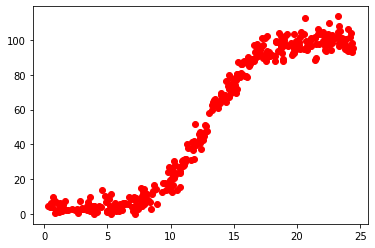

In [54]:
train, test = train_test_split(myExtraEditedFile, test_size=0.2)
xT = np.array(train.iloc[:,0]) # We'll use capital T for train, small t for test
yT = np.array(train.iloc[:,1])
xt = np.array(test.iloc[:,0])
yt = np.array(test.iloc[:,1])
plt.plot(xT, yT, 'ro')
plt.show()

errsum is 0.10683901532732608


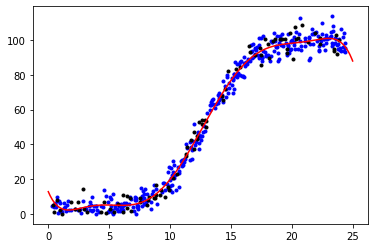

In [55]:
a7,b7,c7,d7,e7,f7,g7,h7 = np.polyfit(xT, yT, 7) #Line of best fit according to training set, 7 polynomial.

errsum = 0
for i in range(len(xt)):
    x_t = test.iloc[i,0]
    y_t = test.iloc[i,1]
    errsum = abs(errsum + (a7 * x_t * x_t * x_t * x_t * x_t * x_t * x_t + b7 * x_t * x_t * x_t * x_t * x_t * x_t + c7 * x_t * x_t * x_t * x_t * x_t + d7 * x_t * x_t * x_t * x_t + e7 * x_t * x_t * x_t + f7 * x_t * x_t + g7 * x_t + h7 -y_t))/len(xt)
print("errsum is", errsum)

plt.plot(xT, yT, 'b.') # This is the training set
plt.plot(xt, yt, 'k.') # This is the test set
plt.plot(x, a7 *x*x*x*x*x*x*x + b7*x*x*x*x*x*x + c7*x*x*x*x*x + d7*x*x*x*x + e7*x*x*x + f7*x*x + g7*x + h7, 'r-') # This plots the line of best fit

plt.show()

In [56]:
print(a7,b7,c7,d7,e7,f7,g7,h7)

-5.441592608803649e-06 0.00047849823803101905 -0.01636267032983717 0.27211993158254644 -2.2696373102971337 9.349446361854149 -16.738590295967015 12.846481315290383


##### References:
[1] Project spec https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/assessment.pdf

[2] CSV file https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

[3] Wind turbines https://en.wikipedia.org/wiki/Wind_turbine

[4] Data preprocessing https://towardsdatascience.com/data-preprocessing-concepts-fa946d11c825

[5] Regression analysis https://en.wikipedia.org/wiki/Regression_analysis